<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Glass_Bangles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/Glass Bangles'

In [4]:
import os
datadir = []

for i in os.listdir(base_dir):
  datadir.append(os.path.join(base_dir, i))

datadir


['/content/drive/MyDrive/Glass Bangles/good',
 '/content/drive/MyDrive/Glass Bangles/broken',
 '/content/drive/MyDrive/Glass Bangles/defect']

In [5]:
dataset = []
for i in range(0, len(datadir)):
  for j in os.listdir(datadir[i]):
    dataset.append(os.path.join(datadir[i], j))

dataset

['/content/drive/MyDrive/Glass Bangles/good/img5047.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5063.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5042.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5038.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5009.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5023.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5060.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5001.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5043.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5121.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5068.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5139.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5103.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5100.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5099.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5140.jpg',
 '/content/drive/MyDrive/Glass Bangles/good/img5104.jpg',
 '/content/dri

In [6]:
# The number of imgaes under each label

for i in range(0, len(datadir)):
  print("The number of images under", datadir[i], "is", len(os.listdir(datadir[i])))

The number of images under /content/drive/MyDrive/Glass Bangles/good is 520
The number of images under /content/drive/MyDrive/Glass Bangles/broken is 316
The number of images under /content/drive/MyDrive/Glass Bangles/defect is 244


In [7]:
# lets try to convert one img into an array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Glass Bangles/defect/img6440.jpg')
img = img_to_array(img)
img = img/255
img
print(img.shape)

(3000, 3000, 3)


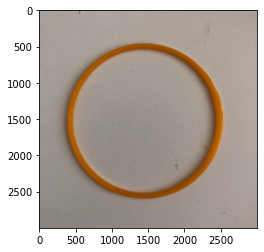

In [8]:
# Get the image back from the array

import matplotlib.pyplot as plt
plt.imshow(img)

In [9]:
translate = {'good': 0, 'defect': 1, 'broken': 2}

In [10]:
image_array = []
image_label = []

for i in dataset:
  img = load_img(i, target_size = (256, 256))
  img = img_to_array(img)
  img = img/255
  image_array.append(img)
  label = i.split('/')[-2]
  image_label.append(translate[label])


In [11]:
import numpy as np
image_array = np.array(image_array)
image_label = np.array(image_label)
print(image_array.shape)
print(image_label.shape)

(1080, 256, 256, 3)
(1080,)


In [12]:
image_label

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
c = len(set(image_label))
print("The number of classes is", c)

The number of classes is 3


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 256, 256, 3)
(216, 256, 256, 3)
(864,)
(216,)


In [16]:
# Build the model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dropout, Dense
from tensorflow.keras.models import Model

In [17]:
X_train[0].shape

i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)

# x = Dropout(0.2)(x)
# x = Dense(256, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax')(x)

m = Model(i, x)

In [18]:
# compile and fit the model

m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
27/27 [==============================] - 13s 61ms/step - loss: 2.8926 - accuracy: 0.5012 - val_loss: 1.0518 - val_accuracy: 0.5278
Epoch 2/20
27/27 [==============================] - 1s 38ms/step - loss: 0.8502 - accuracy: 0.6562 - val_loss: 1.0954 - val_accuracy: 0.5278
Epoch 3/20
27/27 [==============================] - 1s 39ms/step - loss: 0.6192 - accuracy: 0.7535 - val_loss: 1.1741 - val_accuracy: 0.5139
Epoch 4/20
27/27 [==============================] - 1s 39ms/step - loss: 0.6139 - accuracy: 0.7604 - val_loss: 1.1874 - val_accuracy: 0.5324
Epoch 5/20
27/27 [==============================] - 1s 39ms/step - loss: 0.5267 - accuracy: 0.8009 - val_loss: 1.1022 - val_accuracy: 0.5648
Epoch 6/20
27/27 [==============================] - 1s 38ms/step - loss: 0.5030 - accuracy: 0.8009 - val_loss: 1.1460 - val_accuracy: 0.5694
Epoch 7/20
27/27 [==============================] - 1s 39ms/step - loss: 0.5038 - accuracy: 0.7928 - val_loss: 1.0646 - val_accuracy: 0.4583
Epoch 8/20
2

In [19]:
batch_size = 24
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # horizontal_flip=True,
    # rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = m.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
36/36 [==============================] - 11s 283ms/step - loss: 0.6011 - accuracy: 0.7662 - val_loss: 0.5685 - val_accuracy: 0.7685
Epoch 2/50
36/36 [==============================] - 10s 278ms/step - loss: 0.5250 - accuracy: 0.7986 - val_loss: 1.4173 - val_accuracy: 0.5787
Epoch 3/50
36/36 [==============================] - 10s 279ms/step - loss: 0.5282 - accuracy: 0.7859 - val_loss: 0.5354 - val_accuracy: 0.7593
Epoch 4/50
36/36 [==============================] - 10s 280ms/step - loss: 0.4760 - accuracy: 0.8137 - val_loss: 1.5707 - val_accuracy: 0.5694
Epoch 5/50
36/36 [==============================] - 10s 278ms/step - loss: 0.4501 - accuracy: 0.8160 - val_loss: 3.6644 - val_accuracy: 0.5463
Epoch 6/50
36/36 [==============================] - 10s 279ms/step - loss: 0.4809 - accuracy: 0.7847 - val_loss: 1.4967 - val_accuracy: 0.5509
Epoch 7/50
36/36 [==============================] - 10s 279ms/step - loss: 0.5527 - accuracy: 0.7986 - val_loss: 0.8934 - val_accuracy: 0.7130

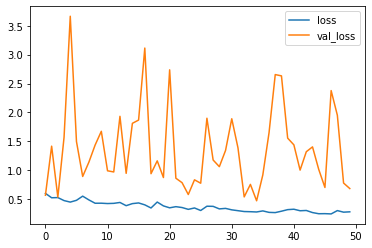

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss' )
plt.legend()

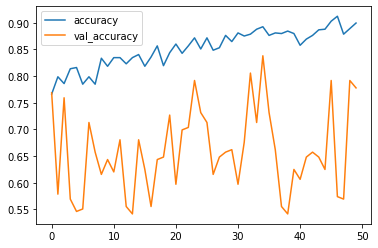

In [21]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy' )
plt.legend()

In [22]:
y_test_pred = m.predict(X_test)

In [23]:
y_test_pred

array([[1.71208736e-02, 7.44662015e-03, 9.75432456e-01],
       [8.63204539e-01, 9.77980047e-02, 3.89975384e-02],
       [8.30111206e-01, 2.02837214e-03, 1.67860389e-01],
       [5.71029425e-01, 2.21015573e-01, 2.07955003e-01],
       [1.64868412e-04, 9.30919647e-01, 6.89155087e-02],
       [1.88283029e-03, 3.46303132e-05, 9.98082519e-01],
       [1.32288050e-03, 9.86747384e-01, 1.19297979e-02],
       [1.00000000e+00, 4.08661660e-10, 7.02469416e-09],
       [2.32704193e-03, 9.93202686e-01, 4.47027339e-03],
       [6.80435300e-01, 5.72616840e-03, 3.13838512e-01],
       [7.65046352e-05, 4.24893707e-01, 5.75029790e-01],
       [2.22534683e-04, 1.28043056e-01, 8.71734440e-01],
       [2.32957587e-01, 3.34491394e-03, 7.63697565e-01],
       [5.92166007e-01, 7.58595346e-03, 4.00248051e-01],
       [9.76448298e-01, 8.91895499e-03, 1.46326860e-02],
       [1.64015816e-07, 5.95122256e-05, 9.99940276e-01],
       [1.55270216e-04, 1.28216162e-01, 8.71628523e-01],
       [1.00000000e+00, 4.59951

In [24]:
y_test_pred_decoded = []

for i in y_test_pred:
  y_test_pred_decoded.append(i.argmax())

y_test_pred_decoded

[2,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 1]

In [25]:
y_test

array([2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0,
       2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1])

In [26]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)

print('accuracy:', accuracy)
print('error:', error)
print('precision:', precision)
print('recall:', recall)
print('f1:',f1)
print('\n')
print(cm)

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_test_pred_decoded))

accuracy: 0.7777777777777778
error: 0.2222222222222222
precision: 0.8048007246376812
recall: 0.7777777777777778
f1: 0.7821872250309456


[[84  9 21]
 [ 2 36  7]
 [ 6  3 48]]


              precision    recall  f1-score   support

           0       0.91      0.74      0.82       114
           1       0.75      0.80      0.77        45
           2       0.63      0.84      0.72        57

    accuracy                           0.78       216
   macro avg       0.76      0.79      0.77       216
weighted avg       0.80      0.78      0.78       216



In [27]:
reverse_translate = {0:'good', 1:'defect', 2:'broken'}

In [28]:
# predict for one random image

img = load_img('/content/drive/MyDrive/Glass Bangles/defect/img6395.jpg', target_size = (256, 256))
img = img_to_array(img)
img = img/255
print(img.shape)

img = np.expand_dims(img, axis = 0)
print(img.shape)

y_test_pred = m.predict(img)
y_test_pred

y_test_pred_decoded = y_test_pred.argmax()
y_test_pred_decoded

print("This bangle belongs to the class", reverse_translate[y_test_pred_decoded].upper())

(256, 256, 3)
(1, 256, 256, 3)
This bangle belongs to the class DEFECT
